Problema de Laplace:
\begin{align*}
    \begin{cases}
        \nabla^{2}\,u(x, y) = 0, \text{ para } (x, y) \in \Omega \\
        u(x, y) = 0, \text{ para } (x, y) \in \partial\,\Omega_{A, B, C} \\
        u(x, y) = \sin(2\,\pi\,x), \text{ para } (x, y) \in \partial\,\Omega_{D}.
    \end{cases}
\end{align*}

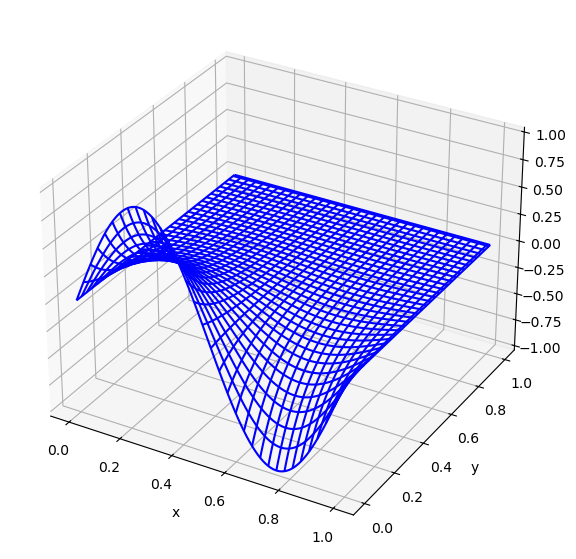

In [10]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.01
x = np.arange(0, 1+h, h)
y = np.arange(0, 1+h, h)

u_a = 0  # Dirichlet em omega_a
u_b = 0  # Dirichlet em omega_b
u_c = 0  # Dirichlet em omega_c
u_d = np.sin(2*np.pi*x)

tam = len(x)

# Monta a matriz T para cada coluna do domínio
T = np.zeros((tam, tam))
T[0, 0] = 1
T[0, 1] = 0

for i in range(1, tam-1):
    T[i, i-1], T[i, i], T[i, i+1] = 1, -4, 1

T[tam-1, tam-1] = 1
T[tam-1, tam-2] = 0

I = np.identity(tam)
I[0] = 0
I[tam-1] = 0

A1 = np.kron(I, T)

e2 = np.diag(np.ones(tam-1), -1) + np.diag(np.ones(tam-1), 1)
e2[0, 1] = 0
e2[-1, -2] = 0

A2 = np.kron(e2, I)

D = np.identity(tam)
e3 = np.diag(np.ones(tam))
e3[1:-1, 0:] = 0

A3 = np.kron(e3, D)

# Matriz final A
A = A1 + A2 + A3

f = np.zeros(tam*tam)

for i in range(tam):
    f[i + 0*tam] = u_a  # Direita
    f[i + (tam-1)*tam] += u_b  # Esquerda
    f[(tam-1) + i*(tam)] += u_c  # Em cima
    f[0 + i*(tam)] += u_d[i]  # Embaixo

solucao = np.linalg.solve(A, f)

u = np.zeros((tam, tam))

for i in range(tam):
    for j in range(tam):
        u[i, j] = solucao[i + tam*j]

x, y = np.meshgrid(x, y)

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(x, y, u, color='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()